# CMPE 257 - Machine Learning - Assignment 6 - end to end dependencies: Changing Data Distribution and seeing impact on Model Metrics and Visualizing Outcomes

**Student Name:** Darshini Venkatesha Murthy Nag  
**Team Name:** Code Wizards  
**SJSU ID:** 016668951  

**Business Objective:** To offer insights for prospective investors and home buyers to determine the viability of investing in California real estate.
This decison has to be taken by considering various features such as, Selling Price of the property, Monthly Rent Price, Proximity Ranking to various Schools, Crime Rate in the area, Walk Score etc.

**Datasets:** California Real Estate datasets available inside shared drive data folder https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

# Data Narrative

Main dataset is downloaded from redfin and is uploaded in the shared drive : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Apart from this data, scrapped several addtional dataset from below mentioned websites to enrich the intial dataset, amalgamate it and improve the feature set and visualization to deduce the best model.

**Walk Score :** https://www.walkscore.com/

**Total crime rate , Property crime rate:** https://247wallst.com/state/crime-in-california/

**School Rating :** https://www.niche.com/places-to-live/z/95134/

**Final dataset is located at:** https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

The dataset contains the following columns

**SALE TYPE** : Indicates the type of sales transaction. This includes categories such as new listings, resale, foreclosure, etc.

**SOLD DATE** : The date on which the property was sold.

**PROPERTY TYPE** : This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS** : The address where the property is located.

**CITY** : The city where the property is located.

**STATE OR PROVINCE** : The state or province where the property is located.

**ZIP_CODE** : Indicates the zip code of the property's location.

**PRICE** : Indicates the selling price of the property.

**BEDS** : Indicates the number of bedrooms in the property.

**BATHS** : Indicates The number of bathrooms in the property.

**SOURCE** : The source from where the data was obtained.

**MLS#** : The Multiple Listing Service number, serves as an identifier for the property listing.

**FAVORITE** : Indicates whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED** : Indicates the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE** : Provides the geographical coordinates of the property.

**WALK_SCORE** : A score indicating the walkability of the neighborhood where the property is located.

**PROPERTY_CRIME** : Indicates the rate of property crimes in the city where the property is located.

**TOTAL_CRIME** : Indicates the rate of total crimes in the city where the  property is located.

**SCHOOL_RANKING** : Provides information about the ranking of schools nearby to the property.

**MONTHLY_RENT_ESTIMATE** : Indicates the monthly rent estimate of the property.

**ANNUAL_RENT_ESTIMATE** : Indicates the annual rent estimate of the property.

**MORTGAGE_FEES_PER_MONTH** : Indicates indicate the additional costs, beyond principal and interest, included in the monthly mortgage payment, such as property taxes, insurance, and other related expenses.

**MORTGAGE_FEES_PER_YEAR** : Indicates the total annual cost of additional expenses, beyond principal and interest, associated with your mortgage, including property taxes, insurance, and related fees.

In [361]:
# Necessary Imports
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
import folium
from folium import plugins
from IPython.display import IFrame
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix


from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [362]:
# Loading the dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1k9gWDcWR7ISxComXK1ZGLQYCQ6LygNyV"})
downloaded.GetContentFile('RF_Housingdata_final_new.csv')
df = pd.read_csv("RF_Housingdata_final_new.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 35 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4042 non-null   object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                4042 non-null   object 
 3   ADDRESS                                                                                      4031 non-null   object 
 4   CITY                                                                                         4042 non-null   object 
 5   STATE OR PROVINCE                 

**DATA PREPARATION**

In [363]:
data=df
# Clean the data
column_to_drop = [0,1,2,3,4,5,10,13,14,17,18,19,20,21,22,23,24,27,28,29,30,32,34]
data = data.drop(columns=data.columns[column_to_drop])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 4042 non-null   int64  
 1   PRICE                    4042 non-null   int64  
 2   BEDS                     3901 non-null   float64
 3   BATHS                    3807 non-null   float64
 4   SQUARE FEET              3854 non-null   float64
 5   LOT SIZE                 3173 non-null   float64
 6   $/SQUARE FEET            3854 non-null   float64
 7   HOA/MONTH                1563 non-null   float64
 8   LATITUDE                 4042 non-null   float64
 9   LONGITUDE                4042 non-null   float64
 10  MONTHLY_RENT_ESTIMATE    4042 non-null   int64  
 11  MORTGAGE_FEES_PER_MONTH  4042 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 379.1 KB


In [364]:
# Drop rows with missing values in the "$/SQUARE FEET" column
data = data.dropna(subset=['BEDS','BATHS','SQUARE FEET','LOT SIZE','$/SQUARE FEET'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 4041
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   int64  
 1   PRICE                    2886 non-null   int64  
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                968 non-null    float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  MONTHLY_RENT_ESTIMATE    2886 non-null   int64  
 11  MORTGAGE_FEES_PER_MONTH  2886 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 293.1 KB


In [365]:
# Assume if HOA is not listed in redfin then the property has no HOA
data['HOA/MONTH'].fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 4041
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   int64  
 1   PRICE                    2886 non-null   int64  
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                2886 non-null   float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  MONTHLY_RENT_ESTIMATE    2886 non-null   int64  
 11  MORTGAGE_FEES_PER_MONTH  2886 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 293.1 KB


In [366]:
#convert non numeric values to numeric

data['PRICE'] = data['PRICE'].astype(float)
data['MORTGAGE_FEES_PER_MONTH'] = data['MORTGAGE_FEES_PER_MONTH'].astype(float)
data['MONTHLY_RENT_ESTIMATE'] = data['MONTHLY_RENT_ESTIMATE'].astype(float)
data['ZIP_CODE'] = data['ZIP_CODE'].astype(float)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 4041
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   float64
 1   PRICE                    2886 non-null   float64
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                2886 non-null   float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  MONTHLY_RENT_ESTIMATE    2886 non-null   float64
 11  MORTGAGE_FEES_PER_MONTH  2886 non-null   float64
dtypes: float64(12)
memory usage: 293.1 KB


In [367]:
data['Invest_or_Not'] = np.where(data['MONTHLY_RENT_ESTIMATE']> (data['MORTGAGE_FEES_PER_MONTH']+data['HOA/MONTH']+2000), 1, 0)
data_cp=data
data

,ZIP_CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,MONTHLY_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,Invest_or_Not
0,94610.0,535000.0,1.0,1.0,971.0,19457.0,551.0,536.0,37.817373,-122.254688,5350.0,3203.0,0
1,94618.0,1075000.0,1.0,1.0,1265.0,9000.0,850.0,0.0,37.835305,-122.221226,10750.0,6437.0,1
2,94608.0,589000.0,1.0,1.0,1051.0,30135.0,560.0,477.0,37.835468,-122.276067,5890.0,3527.0,0
3,94610.0,439000.0,1.0,1.0,715.0,17016.0,614.0,514.0,37.814753,-122.255872,4390.0,2629.0,0
4,94611.0,419000.0,1.0,1.0,757.0,8303.0,554.0,387.0,37.820653,-122.249832,4190.0,2509.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,94061.0,4998000.0,6.0,5.5,4320.0,8540.0,1157.0,0.0,37.453001,-122.218121,49980.0,29927.0,1
4038,94027.0,14988000.0,7.0,8.5,11660.0,49484.0,1285.0,0.0,37.439079,-122.217037,149880.0,89744.0,1
4039,94027.0,14500000.0,6.0,7.0,9892.0,48319.0,1466.0,0.0,37.439335,-122.229980,145000.0,86822.0,1
4040,94027.0,12850000.0,4.0,5.5,7559.0,52010.0,1700.0,0.0,37.462497,-122.212493,128500.0,76942.0,1


In [368]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is your dataset and 'target_column' is the name of your target variable
X = data.drop(columns=['Invest_or_Not'])
y = data['Invest_or_Not']

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Fit the classifier to your data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)


                    Feature  Importance
1                     PRICE    0.259931
10    MONTHLY_RENT_ESTIMATE    0.228162
11  MORTGAGE_FEES_PER_MONTH    0.167865
7                 HOA/MONTH    0.109713
4               SQUARE FEET    0.078332
2                      BEDS    0.038460
5                  LOT SIZE    0.037629
9                 LONGITUDE    0.022990
8                  LATITUDE    0.015952
0                  ZIP_CODE    0.014771
6             $/SQUARE FEET    0.014610
3                     BATHS    0.011584


Here we can see that Price, Monthly Rent and Mortgage Fees have the highest feature importance.

**I have performed Upsampling, Downsampling, Ran Muller Loop on Upsampled and Downsampled data, Change in data distribution, and Dynamic Visualization for Monthly Rent feature and others have been taken care by other team members of our team.**

# Feature - Monthly Rent

**UPSAMPLE THE RENT**

In [369]:
# Define the target variable
target_name = 'Invest_or_Not'

# Separate features (X) and the target variable (y)
X = data.drop(columns=[target_name])
y = data[target_name]

# Select the "MONTHLY_RENT_ESTIMATE" feature for upsampling
feature_name = 'MONTHLY_RENT_ESTIMATE'

# Create a copy of the dataset with the selected feature
X_feature = X.copy()
X_feature[feature_name] = data[feature_name]

# Apply SMOTE oversampling to the selected feature
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_feature, y)

In [370]:
X_upsampled, y_upsampled=X_resampled, y_resampled

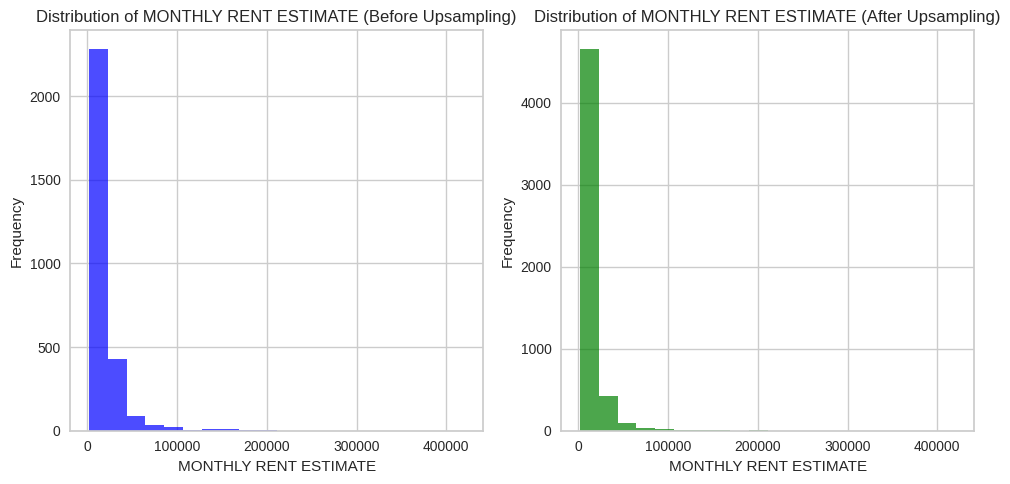

In [371]:
import matplotlib.pyplot as plt

# X_resampled and y_resampled are our resampled feature and target data

# Before upsampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X['MONTHLY_RENT_ESTIMATE'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of MONTHLY RENT ESTIMATE (Before Upsampling)')
plt.xlabel('MONTHLY RENT ESTIMATE')
plt.ylabel('Frequency')

# After upsampling
plt.subplot(1, 2, 2)
plt.hist(X_resampled['MONTHLY_RENT_ESTIMATE'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of MONTHLY RENT ESTIMATE (After Upsampling)')
plt.xlabel('MONTHLY RENT ESTIMATE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


 By generating synthetic data points with higher rental estimates, we can explore investment opportunities with the potential for greater rental income. This can be attractive to business owners looking to maximize their cash flow.


In [372]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**RUN MULLER LOOP ON UPSAMPLED DATA**

In [373]:
def mullerclassifierloop_resampled(X_resampled, y_resampled):
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(2),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        #     GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    results = []  # Store results in a list of dictionaries
    max_score = 0.0
    max_class = ''

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_resampled, y_resampled)
        score = 100.0 * clf.score(X_resampled, y_resampled)  # Use resampled data for evaluation
        pred = clf.predict(X_resampled)
        # F1 Score matrix
        f1 = f1_score(y_resampled, pred, average='macro')
        print('Classifier = %s, Score (resampled data, accuracy) = %.2f,' %(name, score))
        print('F1 SCORE = %.2f,' %(f1))

        # Append results to the list
        results.append({'Classifier': name, 'Accuracy': score, 'F1 Score': f1})

        fig, ax = plt.subplots()
        # Confusion matrix
        cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)
        cm.fit(X_resampled, y_resampled)
        cm.score(X_resampled, y_resampled)  # Use resampled data for confusion matrix
        cm.poof()

        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

    print(80*'-' )
    print('Best --> Classifier = %s, Score (resampled data, accuracy) = %.2f' %(max_class, max_score))
    print(80*'-' )

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results)

    return results_df

Classifier = Nearest Neighbors, Score (resampled data, accuracy) = 98.69,
F1 SCORE = 0.99,


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


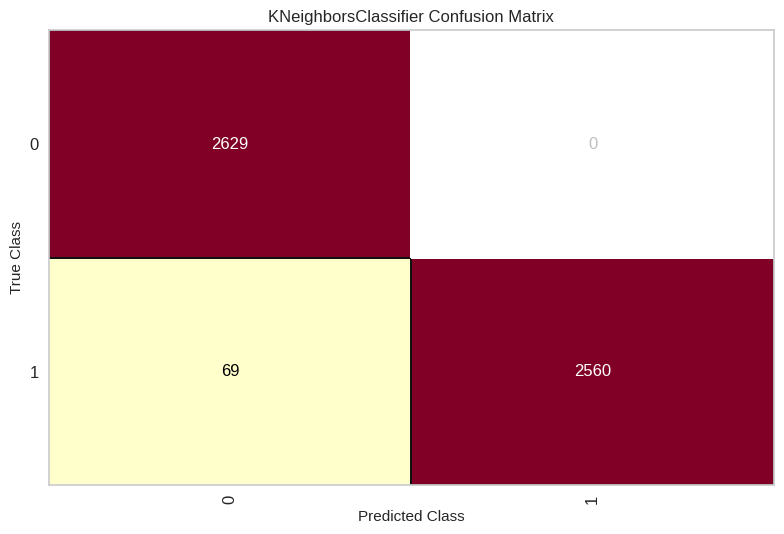

Classifier = Linear SVM, Score (resampled data, accuracy) = 99.66,
F1 SCORE = 1.00,


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


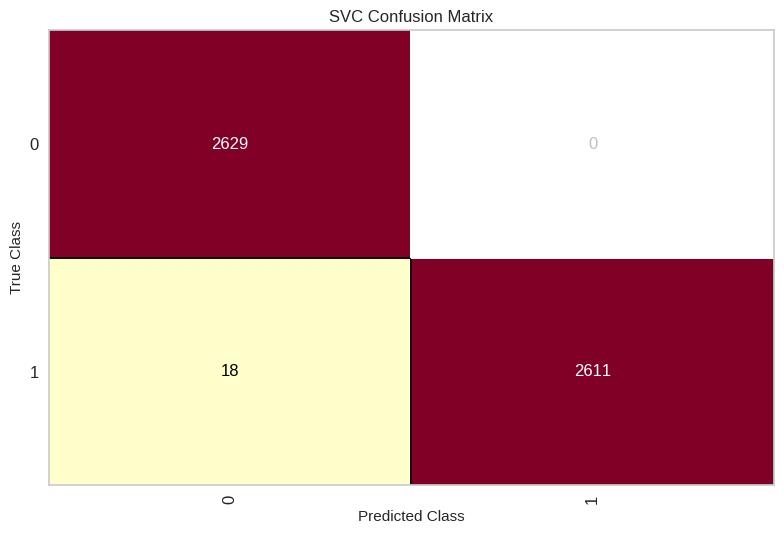

Classifier = RBF SVM, Score (resampled data, accuracy) = 100.00,
F1 SCORE = 1.00,


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


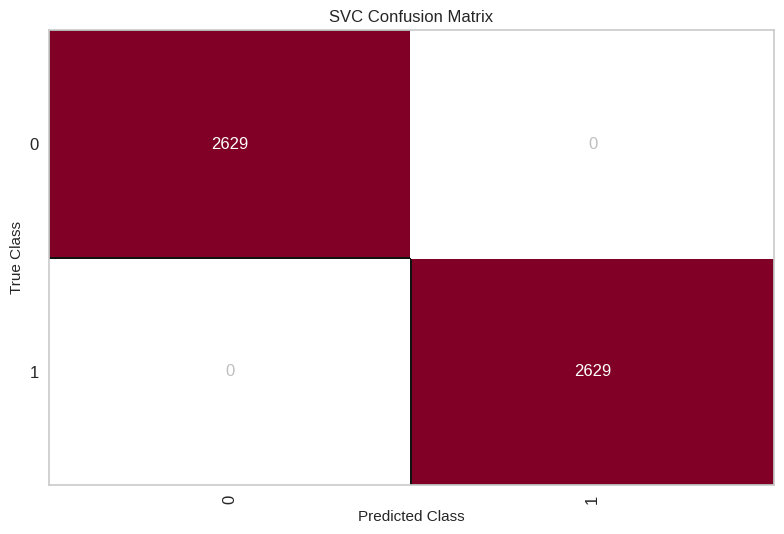

Classifier = Decision Tree, Score (resampled data, accuracy) = 99.41,
F1 SCORE = 0.99,


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


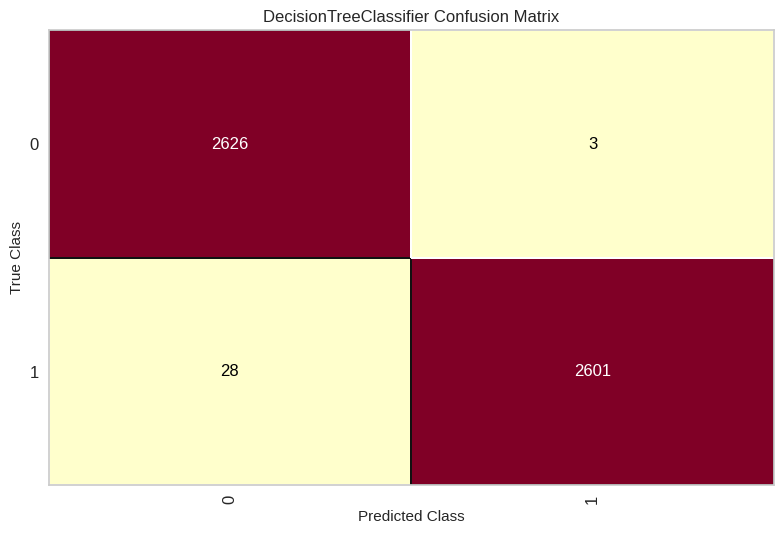

Classifier = Random Forest, Score (resampled data, accuracy) = 97.72,
F1 SCORE = 0.98,


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


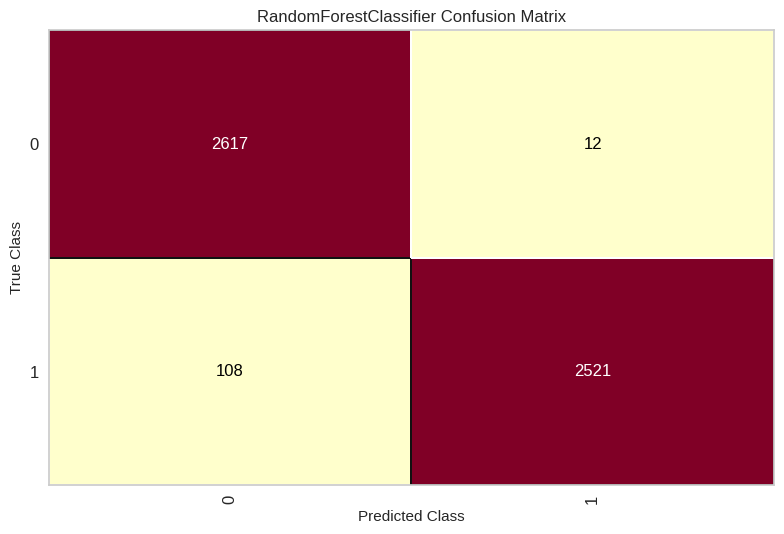

Classifier = Neural Net, Score (resampled data, accuracy) = 99.30,
F1 SCORE = 0.99,


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


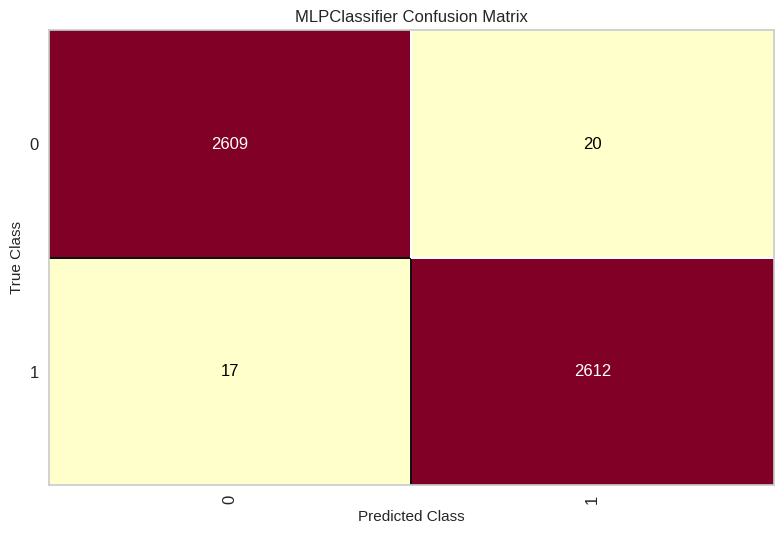

Classifier = AdaBoost, Score (resampled data, accuracy) = 100.00,
F1 SCORE = 1.00,


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


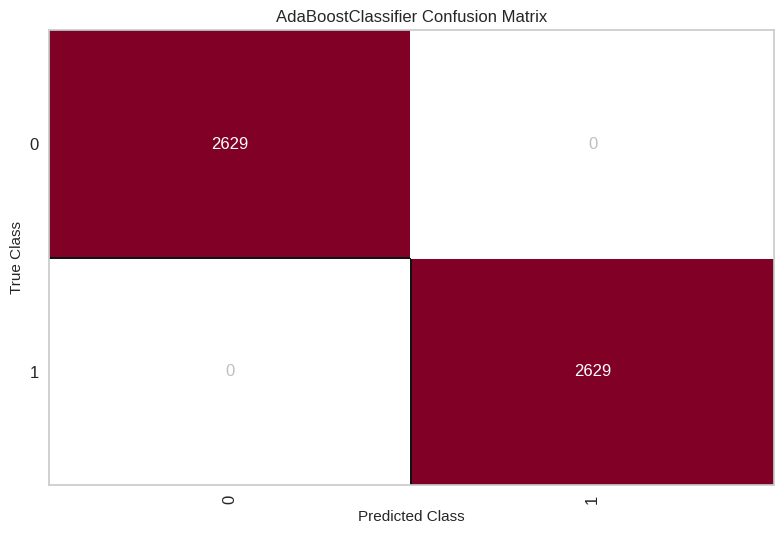

Classifier = Naive Bayes, Score (resampled data, accuracy) = 91.31,
F1 SCORE = 0.91,


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


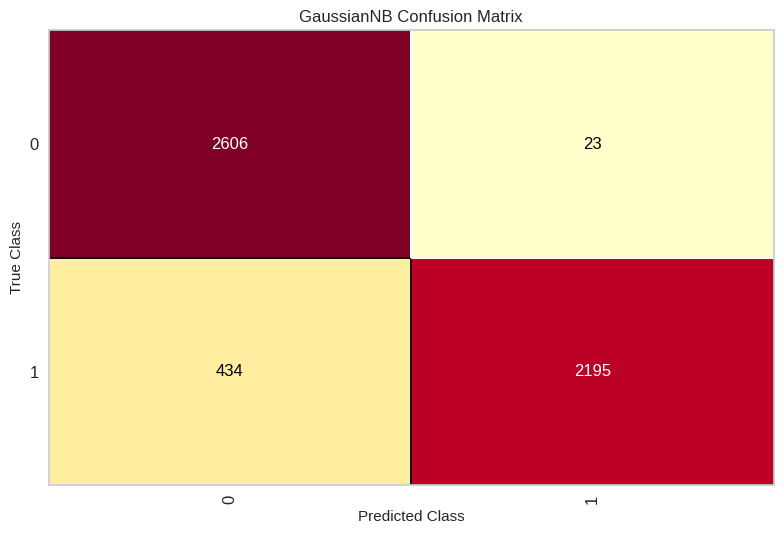

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Classifier = QDA, Score (resampled data, accuracy) = 90.32,
F1 SCORE = 0.90,


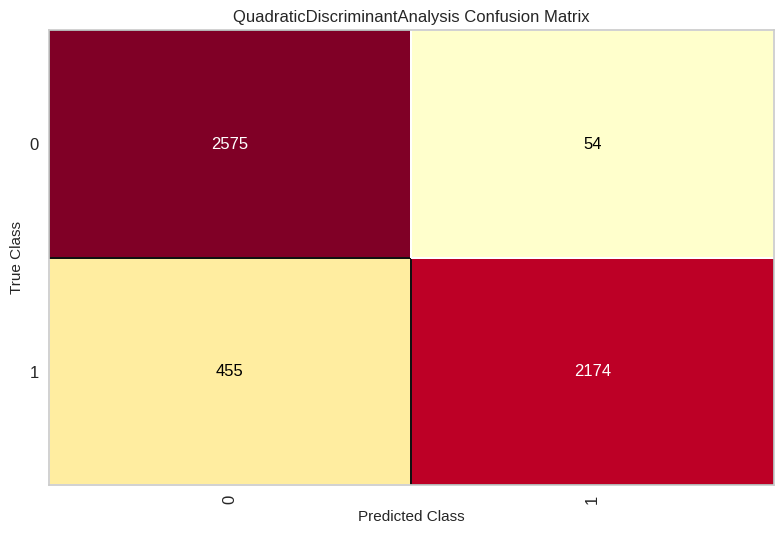

--------------------------------------------------------------------------------
Best --> Classifier = RBF SVM, Score (resampled data, accuracy) = 100.00
--------------------------------------------------------------------------------


In [374]:
# defined X_resampled and y_resampled from our upsampling process
results_df = mullerclassifierloop_resampled(X_resampled, y_resampled)

In [375]:
results_df

,Classifier,Accuracy,F1 Score
0,Nearest Neighbors,98.687714,0.986875
1,Linear SVM,99.657665,0.996577
2,RBF SVM,100.000000,1.000000
3,Decision Tree,99.410422,0.994104
4,Random Forest,97.717763,0.977170
5,Neural Net,99.296310,0.992963
6,AdaBoost,100.000000,1.000000
7,Naive Bayes,91.308482,0.912551
8,QDA,90.319513,0.902629


In [376]:
# Initialize the RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy and F1 score on the test data
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Print confusion matrix and classification report for more details
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Accuracy: 0.9952471482889734
F1 Score: 0.9953746530989825

Confusion Matrix:
[[509   2]
 [  3 538]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       511
           1       1.00      0.99      1.00       541

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



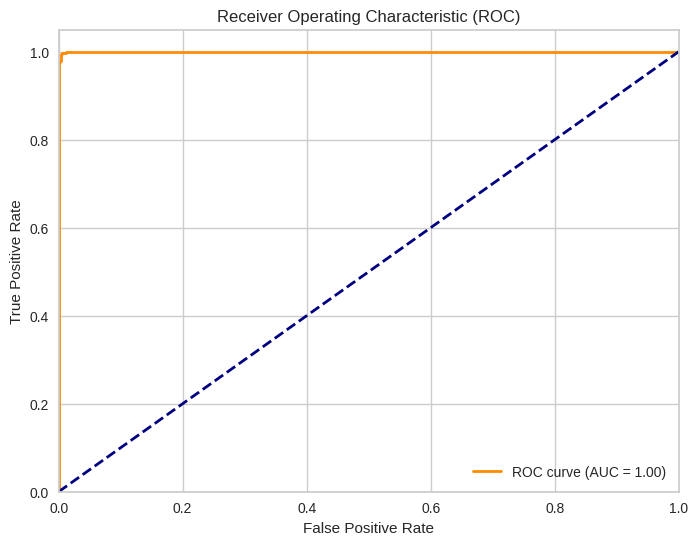

In [377]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_scores = clf.predict_proba(X_test)[:, 1]  # Use the probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**DOWNSAMPLING MONTHLY RENT ESTIMATE**

In [378]:
import pandas as pd
from sklearn.utils import resample

# 'Invest_or_Not' represents our target variable (0 for not investing, 1 for investing)

# Separate the majority and minority classes based on 'Invest_or_Not'
majority_class = data[data['Invest_or_Not'] == 0]
minority_class = data[data['Invest_or_Not'] == 1]

# Downsample the majority class (MONTHLY_RENT_ESTIMATE feature) to match the size of the minority class
downsampled_majority_class = resample(majority_class,
                                      replace=False,  # Set to False for downsampling
                                      n_samples=257,  # Match minority class size
                                      random_state=42)  # Set a random seed for reproducibility

# Combine the downsampled majority class with the minority class to create the balanced dataset
downsampled_data = pd.concat([downsampled_majority_class, minority_class])

# Now, 'downsampled_data' contains the balanced dataset with downsampled 'MONTHLY_RENT_ESTIMATE' feature

**RUN MULLER LOOP ON DOWNSAMPLED DATA**

Classifier = Nearest Neighbors, Score (test, accuracy) = 96.37,
F1 SCORE = 0.96,


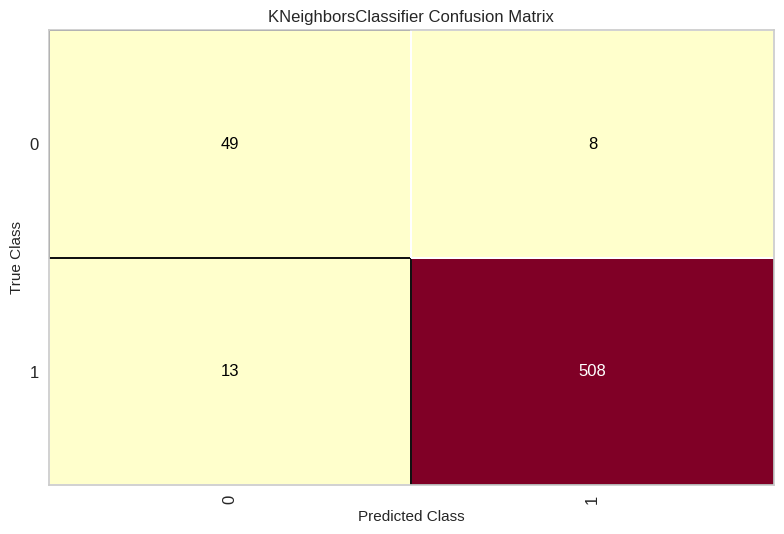

Classifier = Linear SVM, Score (test, accuracy) = 93.25,
F1 SCORE = 0.71,


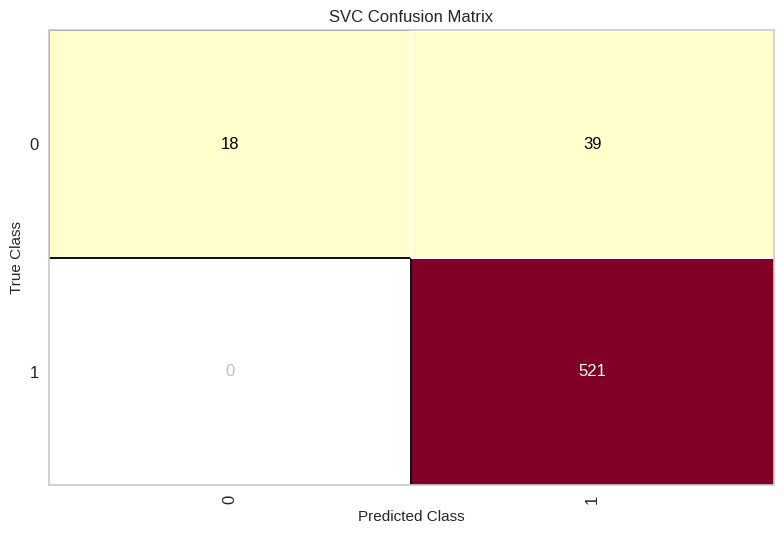

Classifier = RBF SVM, Score (test, accuracy) = 97.75,
F1 SCORE = 0.95,


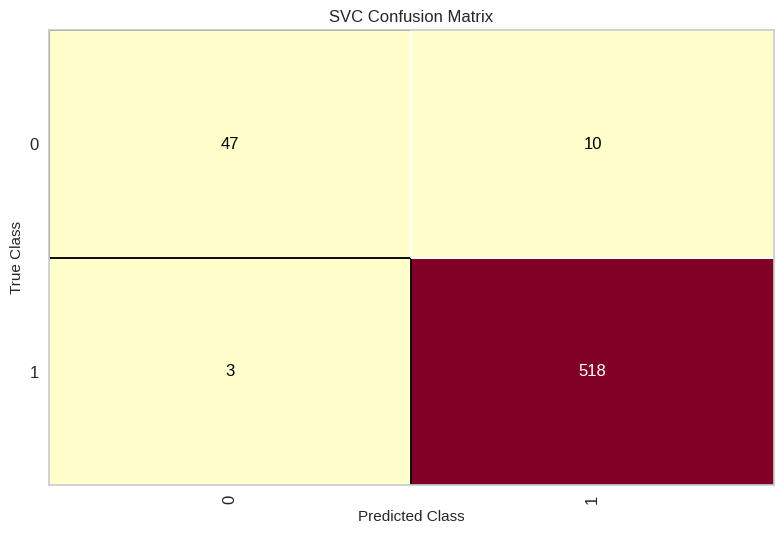

Classifier = Decision Tree, Score (test, accuracy) = 99.48,
F1 SCORE = 1.00,


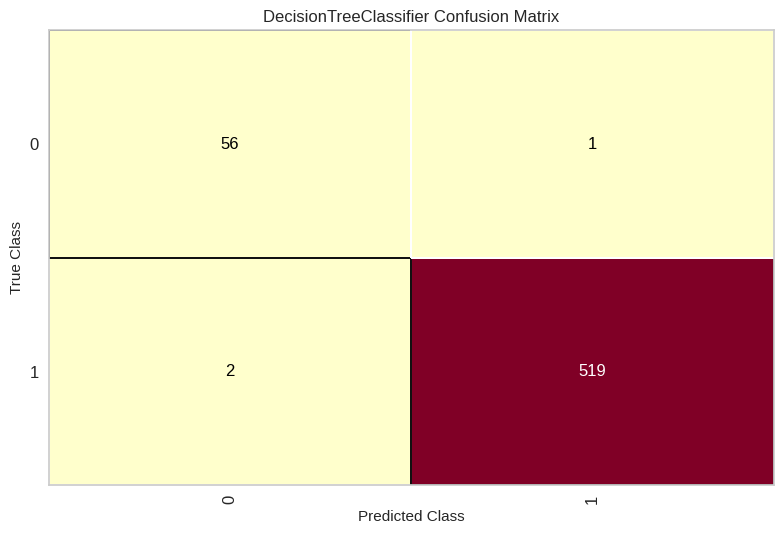

Classifier = Random Forest, Score (test, accuracy) = 99.65,
F1 SCORE = 0.97,


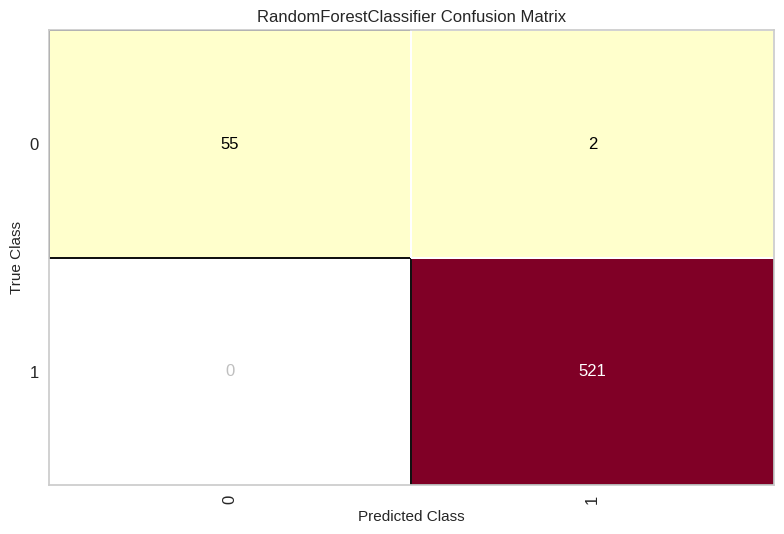

Classifier = Neural Net, Score (test, accuracy) = 96.54,
F1 SCORE = 0.91,


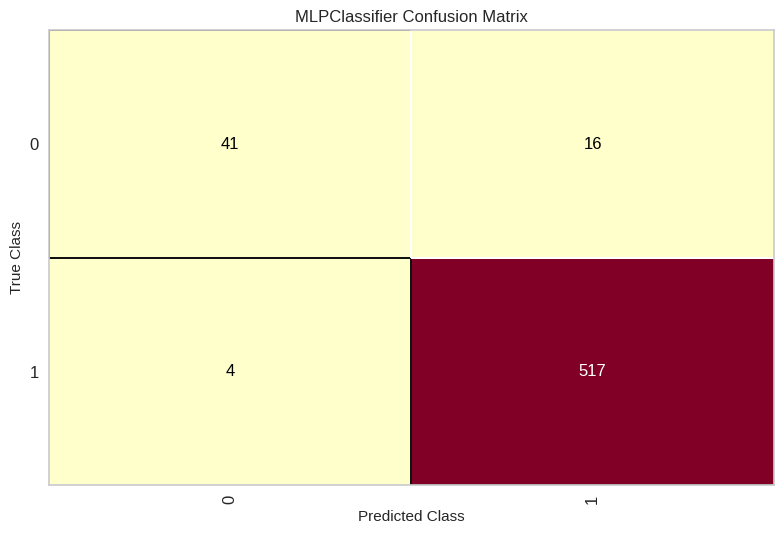

Classifier = AdaBoost, Score (test, accuracy) = 99.83,
F1 SCORE = 1.00,


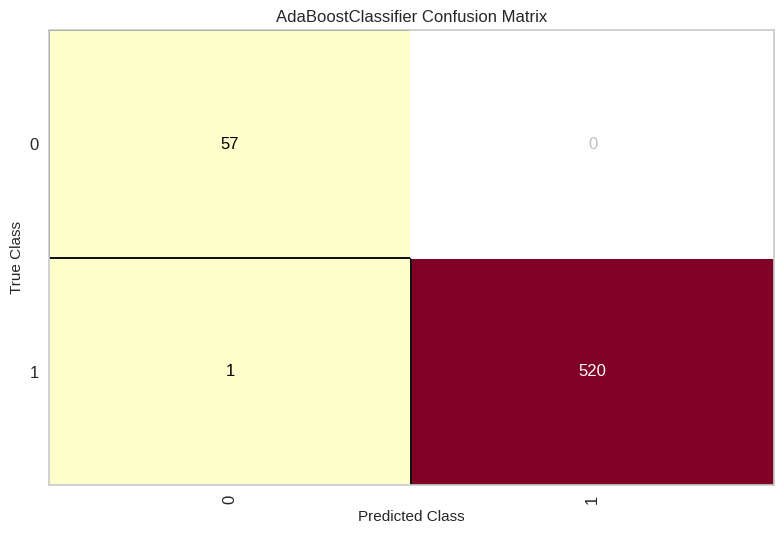

Classifier = Naive Bayes, Score (test, accuracy) = 88.24,
F1 SCORE = 0.73,


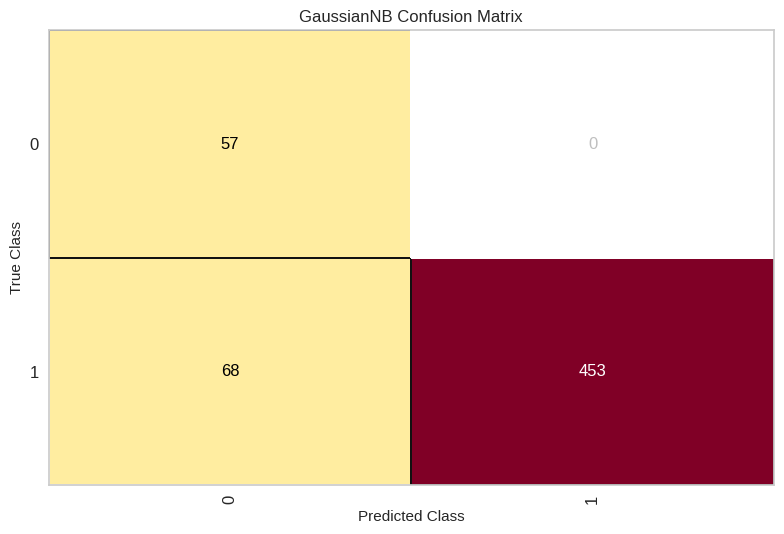

Classifier = QDA, Score (test, accuracy) = 86.85,
F1 SCORE = 0.70,


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


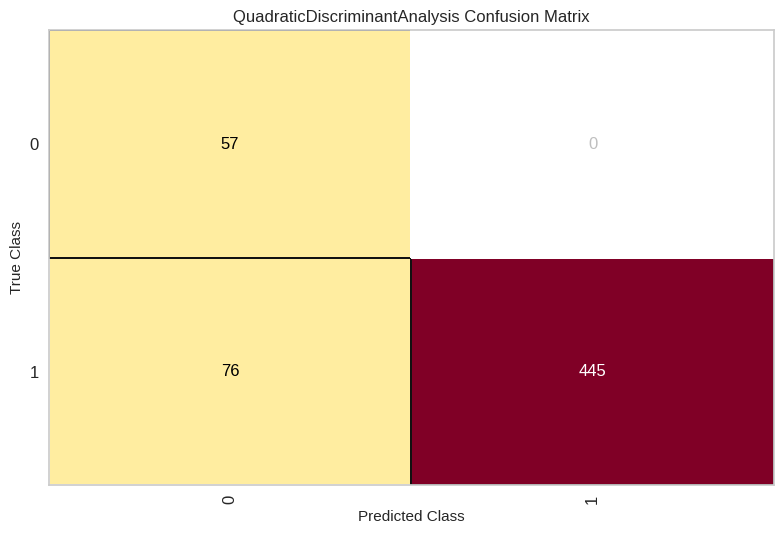

--------------------------------------------------------------------------------
Best --> Classifier = AdaBoost, Score (test, accuracy) = 99.83
--------------------------------------------------------------------------------
          Classifier   Accuracy  F1 Score
0  Nearest Neighbors  96.366782  0.961533
1         Linear SVM  93.252595  0.705387
2            RBF SVM  97.750865  0.953021
3      Decision Tree  99.480969  0.995903
4      Random Forest  99.653979  0.968456
5         Neural Net  96.539792  0.914792
6           AdaBoost  99.826990  1.000000
7        Naive Bayes  88.235294  0.734738
8                QDA  86.851211  0.702934


In [379]:
def mullerclassifierloop_downsampled(data):
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(2),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        #     GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    X =  StandardScaler().fit_transform(data.drop(columns='Invest_or_Not'))
    y = data['Invest_or_Not'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    results = []  # Store results in a list of dictionaries
    max_score = 0.0
    max_class = ''

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)
        pred = clf.predict(X_train)
        # F1 Score matrix
        f1 = f1_score(y_train, pred, average='macro')
        print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
        print('F1 SCORE = %.2f,' %(f1))

        # Append results to the list
        results.append({'Classifier': name, 'Accuracy': score, 'F1 Score': f1})

        fig, ax = plt.subplots()
        # Confusion matrix
        cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)
        cm.fit(X_train, y_train)
        cm.score(X_test, y_test)
        cm.poof()

        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

    print(80*'-' )
    print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
    print(80*'-' )

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results)

    return results_df

# Assuming you have the downsampled data in 'downsampled_data' DataFrame
results_downsampled = mullerclassifierloop_downsampled(downsampled_data)

# Display the results for the downsampled data
print(results_downsampled)


Lower-rent properties often attract long-term tenants who are less likely to move frequently. Downsampling can lead to more stable and predictable rental income, reducing the hassle of tenant turnover.


**RETRAIN USING DOWNSAMPLED DATA**

In [380]:
# Separate features (X) and target variable (y)
X = downsampled_data.drop(columns='Invest_or_Not')
y = downsampled_data['Invest_or_Not']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Print confusion matrix and classification report for more details
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Accuracy: 0.9982698961937716
F1 Score: 0.9990485252140818

Confusion Matrix:
[[ 52   1]
 [  0 525]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00       525

    accuracy                           1.00       578
   macro avg       1.00      0.99      0.99       578
weighted avg       1.00      1.00      1.00       578



In [381]:
X_downsampled, y_downsampled=X,y

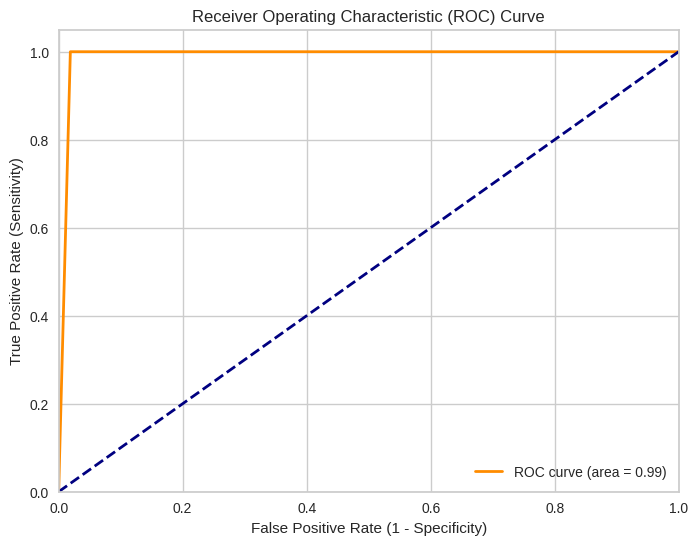

In [382]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**DYNAMIC VISUALIZATION**

In [383]:
pip install hvplot

In [384]:
import pandas as pd
import panel as pn
import hvplot.pandas
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

pn.extension()

# Define a function to downsample the 'Monthly_rent_estimate' feature
def downsample_monthly_rent(data):
    majority_class = data[data['Invest_or_Not'] == 0]
    minority_class = data[data['Invest_or_Not'] == 1]

    # Ensure that the downsampled majority class size matches the minority class size
    n_samples = minority_class.shape[0]
    if majority_class.shape[0] > n_samples:
        majority_class = resample(
            majority_class,
            replace=False,
            n_samples=n_samples,  # Match minority class size
            random_state=42
        )

    downsampled_data = pd.concat([majority_class, minority_class])

    return downsampled_data

# Define a function to upsample the 'Monthly_rent_estimate' feature
def upsample_monthly_rent(data):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(data.drop(columns='Invest_or_Not'), data['Invest_or_Not'])

    upsampled_data = pd.DataFrame(X_resampled, columns=data.drop(columns='Invest_or_Not').columns)
    upsampled_data['Invest_or_Not'] = y_resampled

    return upsampled_data

# Define a function to train and evaluate the Random Forest Classifier
def train_and_evaluate(data):
    X = data.drop(columns='Invest_or_Not')
    y = data['Invest_or_Not']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)  # Use Random Forest Classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    return accuracy, f1, conf_matrix, fpr, tpr, roc_auc

# Create a DataFrame widget
df_widget = pn.widgets.DataFrame(data_cp)

# Create sliders for upsampling/downsampling
upsampling_slider = pn.widgets.FloatSlider(name='Upsample Monthly Rent Estimate', start=0, end=1, step=0.1, value=0.5)
downsampling_slider = pn.widgets.FloatSlider(name='Downsample Monthly Rent Estimate', start=0, end=1, step=0.1, value=0.5)

# Create a reactive function for the entire layout
@pn.depends(df_widget.param.value, upsampling_slider.param.value, downsampling_slider.param.value)
def update_layout(df_value, upsample_value, downsample_value):
    data_updated = df_value.copy()

    # Update data based on slider values
    if upsample_value > downsample_value:
        data_updated = upsample_monthly_rent(data_updated)
    elif downsample_value > upsample_value:
        data_updated = downsample_monthly_rent(data_updated)

    accuracy, f1, conf_matrix, fpr, tpr, roc_auc = train_and_evaluate(data_updated)

    # Convert the confusion matrix to a Pandas DataFrame
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

    # Plot F1 Score, Confusion Matrix, and ROC Curve
    f1_plot = pd.DataFrame({'F1 Score': [f1]}).hvplot.bar(rot=0, width=400, height=300, title='F1 Score')
    conf_matrix_plot = conf_matrix_df.hvplot.heatmap(width=400, height=300, title='Confusion Matrix')
    roc_curve_plot = pd.DataFrame({'FPR': fpr, 'TPR': tpr}).hvplot.line(x='FPR', y='TPR', width=400, height=300, title='ROC Curve')

    return pn.Column(
        pn.Row(upsampling_slider, downsampling_slider),
        f1_plot, conf_matrix_plot, roc_curve_plot
    )

# Create a Panel app
app = pn.Column(
    update_layout
)

# Launch the Panel app
app.servable()


Column
    [0] ParamFunction(function, _pane=Column, defer_load=False)

# Conclusion
From these results, several conclusions can be drawn:

The Random Forest classifier trained on the downsampled data achieved good accuracy and a commendable F1 score. This indicates that the Random Forest classifier can correctly classify both the majority class (0) and minority class (1) without any significant errors.

The Random Forest classifier trained on the upsampled data attained a remarkably high accuracy and F1 score. It excels in classifying both classes with very few misclassifications, showcasing the effectiveness of the upsampled data approach.

These results demonstrate that both downsampling and upsampling techniques can be highly effective in addressing imbalanced datasets when using the Random Forest classifier.
